<a href="https://colab.research.google.com/github/thq4n/Learn-Colab/blob/main/DLGC_Recognizing_handwriten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch; torch.manual_seed(0)
import torchvision

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
my_transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomRotation(5),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(
    './train',
    train=True,
    download=True,
    transform=my_transforms
)

val_dataset = torchvision.datasets.MNIST(
    './eval',
    train=False,
    download=True,
    transform=my_transforms
)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./train/MNIST/raw/train-images-idx3-ubyte.gz to ./train/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./train/MNIST/raw/train-labels-idx1-ubyte.gz to ./train/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./train/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./train/MNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./eval/MNIST/raw/train-images-idx3-ubyte.gz to ./eval/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./eval/MNIST/raw/train-labels-idx1-ubyte.gz to ./eval/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./eval/MNIST/raw/t10k-images-idx3-ubyte.gz to ./eval/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./eval/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./eval/MNIST/raw

Processing...
Done!


In [ ]:
print(train_dataset)
print(val_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./train
    Split: Train
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./eval
    Split: Test
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


In [ ]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


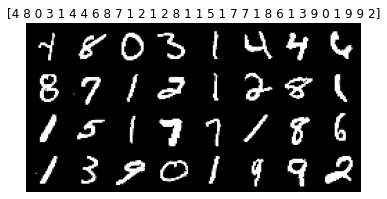

In [ ]:
for images, labels in train_loader:
    grid = torchvision.utils.make_grid(images)
    
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title(labels.numpy())
    plt.axis('off')
    
    plt.show()
    
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


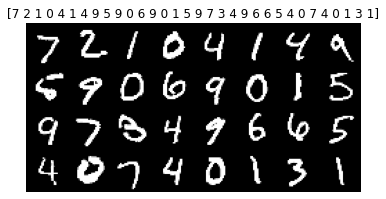

In [ ]:
for images, labels in val_loader:
    grid = torchvision.utils.make_grid(images)
    
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title(labels.numpy())
    plt.axis('off')
    
    plt.show()
    
    break

In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
class DigitNet(torch.nn.Module):
    def __init__(self, hidden_size1, hidden_size2):
        super(DigitNet, self).__init__()
        self.linear1 = torch.nn.Linear(28 * 28, hidden_size1)
        self.relu1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = torch.nn.ReLU()
        self.output = torch.nn.Linear(hidden_size2, 10)
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.output(out)
        
        return out

In [ ]:
n_epochs = 10
learning_rate = 0.001

model = model(128, 128)
# model = model1
# model = model2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
if torch.cuda.is_available():
    print('CUDA is available. Using the GPU.')
    device = torch.device('cuda')
else:
    print('CUDA is not available. Using the CPU.')
    device = torch.device('cpu')

CUDA is not available. Using the CPU.


In [ ]:
model = model.to(device)
losses = []

for epoch in range(n_epochs):
    running_loss = 0
    
    for images, labels in train_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        
        output = model(images)
        loss = criterion(output, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
    
    losses.append(running_loss / len(train_loader))
    print(f'Epoch {epoch + 1}/{n_epochs}: {losses[-1]:.4f}')

Epoch 1/10: 57.5745
Epoch 2/10: 23.9081
Epoch 3/10: 15.3452
Epoch 4/10: 12.8182
Epoch 5/10: 11.5476
Epoch 6/10: 10.7421
Epoch 7/10: 10.1206
Epoch 8/10: 9.6560
Epoch 9/10: 9.2569
Epoch 10/10: 8.9080


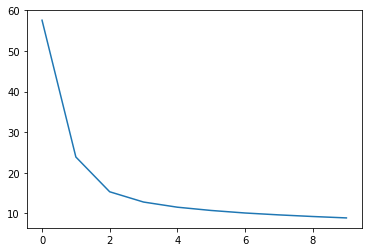

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        
        output = model(images)
        _, preds = torch.max(output.data, 1)
        
        total += labels.size(0)
        correct += (preds == labels).sum().item()
    
    print(f'Accuracy: {100 * correct / total}%')

Accuracy: 92.26%


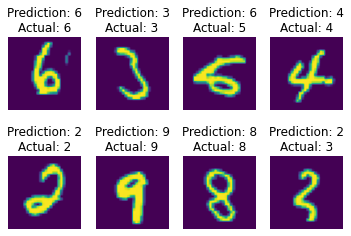

In [ ]:
import random

n_images = 8

with torch.no_grad():
    for i in range(n_images):
        plt.subplot(2, n_images // 2, i + 1)
        index = random.randint(0, total - 1)
        img, label = val_dataset[index]
        
        temp_img = img.reshape(-1, 28 * 28).to(device)
        output = model(temp_img)
        _, pred = torch.max(output.data, 1)
        
        plt.imshow(img.squeeze(0).numpy())
        plt.title(f'Prediction: {pred.item()}\nActual: {label}')
        plt.axis('off')
    
    plt.show()

In [1]:
model1 = torch.nn.Sequential(
    torch.nn.Linear(784, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)

model1

NameError: ignored

In [ ]:
model

DigitNet(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
model2 = torch.nn.Sequential(
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

model2

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
)